In [156]:
import pandas as pd
df_cw = pd.read_csv('supervised2.csv')
df_cw

,Country,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_Expectancy
0,Afghanistan,Developing,263,62,71.279624,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,74,0,364.975229,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,Developing,19,21,0.000000,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,0.000000,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,0.000000,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,76.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Uruguay,Developing,116,0,0.000000,95,0,64.0,0,95,95,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5,77.0
126,Uzbekistan,Developing,184,15,0.000000,99,22,44.7,17,99,99,0.1,2137.576852,312989.0,3.0,3.1,0.697,12.1,69.4
127,Vanuatu,Developing,13,0,0.000000,64,39,53.3,0,65,64,0.1,285.834140,26463.0,1.5,1.4,0.598,10.8,72.0
128,Zambia,Developing,33,27,0.000000,9,9,23.4,40,9,9,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,61.8



- The first two columns of this data contains nominal data
- The remaining 17 columns are numeric.

The target attribute is 'Life_Expectancy' while the other columns are our features. 

In [157]:
print(df_cw['Life_Expectancy'])
print(df_cw['Life_Expectancy'].describe())

0      65.0
1      77.8
2      75.6
3      52.4
4      76.3
       ... 
125    77.0
126    69.4
127    72.0
128    61.8
129    67.0
Name: Life_Expectancy, Length: 130, dtype: float64
count    130.000000
mean      70.741538
std        7.997381
min       51.000000
25%       65.725000
50%       72.150000
75%       76.025000
max       85.000000
Name: Life_Expectancy, dtype: float64


Target variable contains numeric data.


Target attribute datatype is a floating number. Therefore, the target variable is numerical. 

Since what we are trying to predict is a numeric/continous value, this supervised task is a __REGRESSION__ task

70.74153846153843

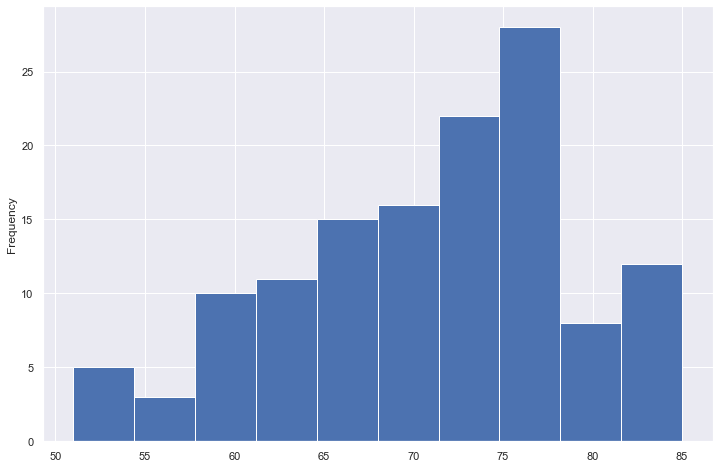

In [158]:
#We would now plot the frequency distribution of the target variable.

df_cw['Life_Expectancy'].plot.hist();
df_cw['Life_Expectancy'].mean()

From the above, we can see that the life expentacy across all countries lies between the ages >50 and <85 with an average of 70 years. The highest number of life expectancy between the ages 75 and 77(estimated).

We can also see that our target variable is not normally distributed.

In [159]:
#The line below separates our data into a matrix of features, x, and target attribute, y.
x = df_cw.drop('Life_Expectancy', axis = 1) 
y = df_cw['Life_Expectancy']

In [160]:
#The line below shows that the feature data has 130 observations(rows) and 18 features(columns)
x.shape

(130, 18)

To check if our data is standardised, then we need to check if the mean and standard deviation are 0 and 1 respectively.
Below, we use the Pandas function describe() to have a look at some basic statistics of our data in which we can check for mean
and standard deviation.

In [161]:
x.describe()

,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,130.000000,130.000000,130.000000,130.000000
mean,158.676923,27.723077,3.355807,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07,4.680769,4.780769,0.674792,12.746923
std,99.484969,96.426702,32.567606,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07,4.380632,4.477144,0.151216,2.760159
min,1.000000,0.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03,0.100000,0.100000,0.347000,5.400000
25%,79.000000,0.000000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05,1.525000,1.550000,0.550500,10.800000
50%,145.500000,3.000000,0.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06,3.400000,3.450000,0.701500,12.750000
75%,215.000000,20.500000,0.000000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07,6.500000,6.575000,0.784000,14.675000
max,484.000000,910.000000,364.975229,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08,26.700000,27.300000,0.937000,20.400000


From the description above, we can see that our data is __not standardised__.



Before continuing, there are two features (the 'Status' and 'Country' features) in the feature data that are nominal and not numeric. They both can be seen in cell 1 above.

Since the 'Status' feature is categorical with just two categories(the details of the categories can be seen in the cell below), then we can decide to convert it to binary using the map() function.

In [162]:
x['Status'].value_counts()  #checking the values of the Status feature

Developing    111
Developed      19
Name: Status, dtype: int64

In [163]:
x['Status'] = x['Status'].map({'Developing': 1, 'Developed': 0})   #mapping the 'Status' values to binary i.e 0s  and 1s
x['Status']

0      1
1      1
2      1
3      1
4      1
      ..
125    1
126    1
127    1
128    1
129    1
Name: Status, Length: 130, dtype: int64

In [164]:
x['Status'].value_counts()  #checking the new values of the 'Status' feature

1    111
0     19
Name: Status, dtype: int64

In [165]:
x['Country'].value_counts()   #checking the values of the 'Country' feature

Afghanistan           1
Portugal              1
Philippines           1
Peru                  1
Paraguay              1
                     ..
Equatorial Guinea     1
El Salvador           1
Ecuador               1
Dominican Republic    1
Zimbabwe              1
Name: Country, Length: 130, dtype: int64

The 'Country' feature contains 130 unique values which can not be considered as categorical.
We can either be drop it or index since it is not necessarily important to our task.

The 'Country' feature will be indexed.

In [166]:
x.set_index('Country', inplace = True)  # Indexing the 'Country' column

In [167]:
x.head()
#We can now see with the output below that the 'Country' feature has been indexed. So, it is no longer a part of our features.

,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,
Afghanistan,1,263,62,71.279624,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Albania,1,74,0,364.975229,99,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
Algeria,1,19,21,0.000000,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
Angola,1,335,66,0.000000,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
Argentina,1,116,8,0.000000,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3


Looking at the number of features we have to the ratio of the number of observations we have, we can see that the features are too much. We should at most of the ratio of 10 observations to 1 feature, and if we are going by that, it means we need to have atleast 170 observations (because we now have 17 features after indexing the 'Country' column).

In order to reduce the number of features we have, we can try using the VIF (Variance Inflation Factor) analysis to eleminate the most correlated values. This is because we know that our data correlated. To get stable beta coefficients, a linear regression model requires no multicolinearity on feature data anyways.
And no multicolinearity means no correlation between the features. We can reduce the multicollinearity with VIF

To check the correlation, the corr() function in pandas will be used.


In [168]:
x.corr() #printing out the correlation table

,Status,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,1.000000,0.311541,0.117142,0.042796,-0.129949,0.072353,-0.324721,0.120709,-0.224017,-0.220499,0.187251,-0.458099,-0.036725,0.320532,0.325340,-0.538470,-0.536225
Adult Mortality,0.311541,1.000000,0.154840,-0.056151,-0.134546,0.027975,-0.351283,0.178261,-0.300425,-0.228731,0.632276,-0.314540,0.032840,0.254959,0.259090,-0.587776,-0.466075
infant deaths,0.117142,0.154840,1.000000,-0.018945,-0.075556,0.824389,-0.208357,0.993963,-0.120151,-0.106575,0.070195,-0.115139,0.269533,0.557387,0.555316,-0.197383,-0.215488
percentage expenditure,0.042796,-0.056151,-0.018945,1.000000,0.053143,-0.018023,0.054433,-0.019436,0.010948,0.047256,-0.046816,-0.026668,-0.020973,-0.020541,-0.020098,0.028133,0.029464
Hepatitis B,-0.129949,-0.134546,-0.075556,0.053143,1.000000,0.034322,0.147275,-0.093338,0.503902,0.895829,-0.342678,0.088400,-0.045324,-0.038189,-0.086664,0.279625,0.304968
Measles,0.072353,0.027975,0.824389,-0.018023,0.034322,1.000000,-0.125854,0.787330,-0.013857,0.019518,-0.040197,-0.068698,0.125615,0.376052,0.367871,-0.057675,-0.062165
BMI,-0.324721,-0.351283,-0.208357,0.054433,0.147275,-0.125854,1.000000,-0.218591,0.198913,0.167397,-0.265041,0.387052,0.005963,-0.487245,-0.505187,0.622817,0.612644
under-five deaths,0.120709,0.178261,0.993963,-0.019436,-0.093338,0.787330,-0.218591,1.000000,-0.138411,-0.126753,0.097053,-0.120094,0.308769,0.547162,0.543834,-0.220828,-0.236128
Polio,-0.224017,-0.300425,-0.120151,0.010948,0.503902,-0.013857,0.198913,-0.138411,1.000000,0.577022,-0.375415,0.218366,-0.233270,-0.175525,-0.176887,0.442925,0.387310
Diphtheria,-0.220499,-0.228731,-0.106575,0.047256,0.895829,0.019518,0.167397,-0.126753,0.577022,1.000000,-0.406572,0.200140,-0.053164,-0.080184,-0.131753,0.397359,0.388661


To visualise this correlation matrix, we will use the heatmap seaborn package.


<AxesSubplot:>

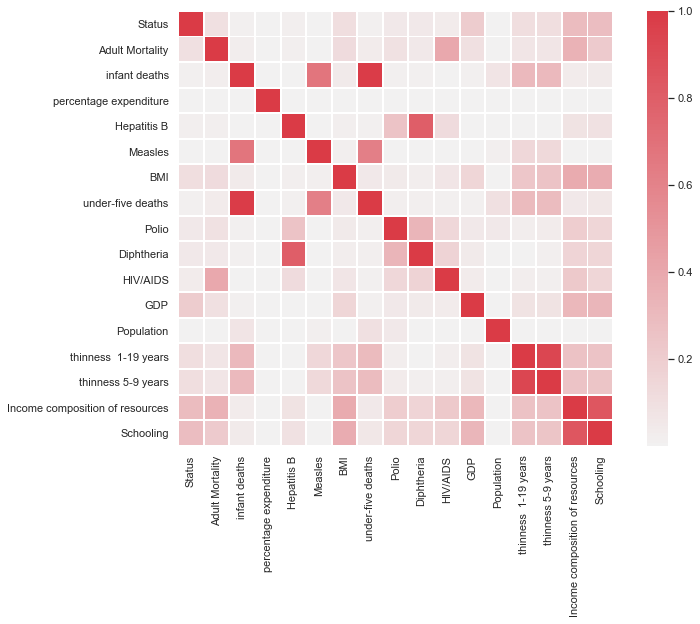

In [169]:
import seaborn as sb

# Creating a colormap
cmap = sb.diverging_palette(100, 10, as_cmap=True)

sb.heatmap(x.corr()**2, cmap=cmap, center=0, square=True, linewidths=1.0)

We can observe from the visualisation above that our data contains a significant amount of multicollinearity.
We now check the most correlated variables using VIF and remove them.

The code below performs the VIF analysis

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

vif = pd.DataFrame(data = np.array(x.columns), columns=["attribute"])
vif['VIF'] = -1

for i in range(0, x.shape[1]):
    vif.loc[i,'VIF'] = variance_inflation_factor(x.values, i) 
    
print(vif)

                          attribute         VIF
0                            Status    7.865953
1                   Adult Mortality    7.377049
2                     infant deaths  186.481017
3            percentage expenditure    1.027661
4                       Hepatitis B   65.139385
5                           Measles    5.042033
6                               BMI    8.996337
7                 under-five deaths  159.121987
8                             Polio   20.669695
9                        Diphtheria   91.232763
10                         HIV/AIDS    2.535303
11                              GDP    2.163011
12                       Population    1.702698
13             thinness  1-19 years   39.893723
14               thinness 5-9 years   39.867353
15  Income composition of resources  182.608239
16                        Schooling  173.614277


In [171]:
#The features having the lowest VIF are the most uncorrelated.
#Keep the threshold of VIF as 10

#The code below produces features that their VIF is less than 10

vif_noMulticol = vif[vif.VIF<10]
print(vif_noMulticol)

                 attribute       VIF
0                   Status  7.865953
1          Adult Mortality  7.377049
3   percentage expenditure  1.027661
5                  Measles  5.042033
6                      BMI  8.996337
10                HIV/AIDS  2.535303
11                     GDP  2.163011
12              Population  1.702698


After execution, we see that our we have just 8 uncorrelated features. 
This has helped us to reduce the high number of features we had initialy.

Now, we will use only these as our features for our prediction.

The next block of code is assigning the new reduced features as our new __x__

In [172]:
x = x.loc[:, vif_noMulticol.attribute]
x.head()

,Status,Adult Mortality,percentage expenditure,Measles,BMI,HIV/AIDS,GDP,Population
Country,,,,,,,,
Afghanistan,1,263,71.279624,1154,19.1,0.1,584.259210,33736494.0
Albania,1,74,364.975229,0,58.0,0.1,3954.227830,28873.0
Algeria,1,19,0.000000,63,59.5,0.1,4132.762920,39871528.0
Angola,1,335,0.000000,118,23.3,1.9,3695.793748,2785935.0
Argentina,1,116,0.000000,0,62.8,0.1,13467.123600,43417765.0


In [173]:
#Turning the target attribute to a 2D array
y = y.values.reshape(-1, 1)

__PIPELINE;__

The initial pipeline used is defined as follow:

- Standardisation of features.
- OLS regression on the feature space.

This pipeline was used at first because it is the "simplest" regression model. Then after trying Linear regresion, it was actually not the best model to use for the task but this wasn't known until it was tested.

After it was tested, Ridge regression was also used. Ridge regression is a version of linear regression in which the loss function is altered to reduce the model's complexity. To make this alteration, a parameter that is equal to the square of the coefficients' magnitude is added. 

The model finally used was for this task was Random Forest. The ensemble learning approach is used by Random Forest Regression. In order to produce predictions that are more accurate than those from a single model, the ensemble learning method integrates predictions from several machine learning algorithms.

Final pipeline was;
- RandomForestRegressor.

This was because it gave the most accurate and the best model.

The initial pipeline that entailed Linear regression included standardisation. This was because standardised variables are necessary for a linear regression model that can be understood. This is why the features were standardised.

The code below computes the  R2 for such pipeline

In [174]:
# Splitting data into train-test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20, shuffle=True) 
#20% of the data was allocated to the test data while the remaining 80% to the train data

In [175]:
from sklearn.preprocessing import StandardScaler #Library to standardise data
from sklearn.linear_model import LinearRegression #Library to use OLS Regression
from sklearn.pipeline import Pipeline #Library to create a pipeline


lm = LinearRegression()
scaler = StandardScaler()

#Standardising 
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train) 
y_test = scaler.transform(y_test)
    
#creating the pipeline
pipe = Pipeline([('scaler', StandardScaler()), # scaling feature data
                 ('lm', LinearRegression())]) # training a linear regression model

# using the pipeline
pipe.fit(x_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

pipe.score(x_test, y_test)
R2_test = pipe.score(x_test, y_test)
print(R2_test)
R2_train = pipe.score(x_train, y_train)
print(R2_train)

0.7891368325503089
0.7058275150812756


This R2 Score is actually not bad but it can be much better. 
This R2 score is not satisfying, Our model can perform better.
A higher R2 score can be gotten with another model.

Let's try using Ridge Regression instead in our pipeline

In [176]:
#Library to use Ridge Regression
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

steps = [('model', Ridge(alpha=1))]
# Instantiate and fit the model (on the training set)

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

# Check the score of the model on the test set
print(ridge_pipe.score(x_test, y_test))
print(ridge_pipe.score(x_train, y_train))

0.7901319757488894
0.7058137530608093


This model gave a lower R2 score than the OLS regression which is not our goal. Our goal is to have a better R2 score.

Let's use Random forest instead;

In [177]:
# Import the RandomForestRegressor model class from the ensemble module...
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

#pipeline
steps = [('model', RandomForestRegressor())]

# Instantiate and fit the model (on the training set)
model = Pipeline(steps)
model.fit(x_train, y_train.ravel())

# Check the score of the model on the test set
print(model.score(x_test, y_test))
print(model.score(x_train, y_train))

0.8913053075203692
0.9763189104484176


This score is way better that the scores we have gotten earlier. 
The accuracy is 98% on the train data and 85% on the test data.

The accuracy scores are high on both the train and test data.
It is known that if it has a high score on the training and performs poorly on test, then it overfits(high variance) but if it performs poorly on training and highly test, then it underfits(high bias). In this scenario, the model persorms well on both train and test so it can be said that this is a good bias-variance trade off. 


- n>>p is low dimension
n<<P is high dimension
where n = no of training samples
p = no of features

Number of training samples is 80% of the entire dataset which is about 104 samples out of the 140 samples of the entire dataset. The number of features used is 8
     
Therefore, n >> p i.e __LOW DIMENSION__

The proposed pipeline doesn't compulsorily need any fine tuning phase because the model already has high accuracy but we can still try tuning to see if we can get more/higher accuracy.

This dataset is divided into tuning and validation.
To later assess the accuracy of our model, the validation data remains unseen.

80% of the data is made up of tuning data, and the remaining 20% is used for the validation set.

Also, we are going to run K-Fold validation on our tuning data

In [179]:
from sklearn.model_selection import train_test_split
#spliting into tuning and validation.
#NB: This doesn't necessarily need to be done since we already split into train and test earlier but I am doing this for
#my own understanding
x_tuning, x_val, y_tuning, y_val = train_test_split(x, y, test_size=0.20, random_state=20, shuffle=True)

from sklearn.model_selection import KFold
#K-Fold validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)
kf.get_n_splits(x_tuning)



5

In [180]:
# Empty vectors of scores
R2l_train =[]  
R2l_test = []   
max_features = range(1, x_tuning.shape[1])
 
for a in max_features:
    R2_train = [] 
    R2_test = [] 
    for train_index, test_index in kf.split(x_tuning):    # K-fold validation
        x_train, x_test = x_tuning.iloc[train_index], x_tuning.iloc[test_index]   # Splitting data into train-test
        y_train, y_test = y_tuning[train_index], y_tuning[test_index]
        
        #Building the pipeline  
        pipe = RandomForestRegressor(random_state=42,max_features=a)
    
        #Fitting pipeline 
        pipe.fit(x_train, y_train.ravel())
        
         # Check the score of the model on the train set
        R2_train.append(pipe.score(x_train, y_train))
        # Check the score of the model on the test set
        R2_test.append(pipe.score(x_test, y_test))
        
    # Updating the vector of accuracies for a specific alpha value
    R2l_train.append( np.mean(R2_train) )
    R2l_test.append( np.mean(R2_test) )

In [181]:
#Putting our accuracy scores into a datframe in other to print it out as a dataframe
accuracies = pd.DataFrame({"max_features": max_features,
                          "R2_train": R2l_train,
                          "R2_test": R2l_test})
accuracies.head()

,max_features,R2_train,R2_test
0,1,0.972396,0.807238
1,2,0.977290,0.848294
2,3,0.978636,0.855975
3,4,0.981064,0.864773
4,5,0.979799,0.864986


Above we see the various accuracies during the tuning process

In [182]:
#Checking for the best acuracy using the max feature. 
tunedMax_features = max_features[np.argmax(R2l_test)]
print("Tuned Max_features:", tunedMax_features)

Tuned Max_features: 5


After the running it, we see that the best accuracy is the 5th one which is 

R2_Train = 97.9 approximately 98%

R2_Test = 86%

Checking how our tune model peforms on validation data (which is unseen).

In [183]:
from sklearn.pipeline import make_pipeline #pipeline library

L_model = make_pipeline(RandomForestRegressor(random_state=42,max_features=5))

L_model.fit(x_tuning, y_tuning.ravel())  #fitting the data

print("final R2 train: ", L_model.score(x_tuning,y_tuning))
print("final R2 test: ", L_model.score(x_val,y_val))

final R2 train:  0.9789145788768223
final R2 test:  0.912538003460956


As can be seen above, the model performs well after validation and even better on the R2 test.
It maintains it's 98% on the train data but goes higher on the test data.

Our final tuned model has a good bias-variance trade-off. Both the train and test accuracy are close to each other.

In comparison with the untuned model which was 98% on the train data and 85% on the test data, the tuned model performs better on the test data which is a good thing.

The below block of code aims to show the features that are most responsible for generating the final predictions.

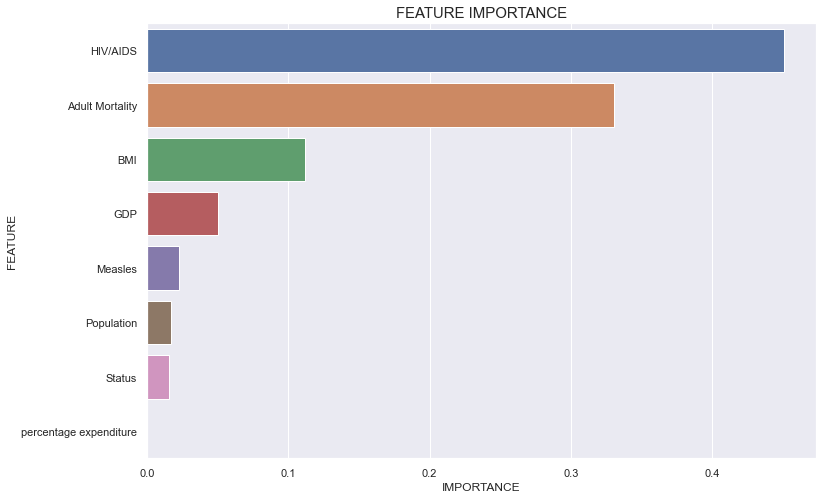

In [184]:
import seaborn as sb  #visualisation library
import matplotlib.pyplot as plt #visualisation library to specify details of the graph

#putting the features and their level of importance into a data frame
features = pd.DataFrame({
    "feature": x.columns,
    "importance": L_model[-1].feature_importances_
})

# building the graph
sb.set(rc={'figure.figsize':(12,8)})
sb.barplot(
    x = "importance", 
    y = "feature", 
    data = features,
    order = features.sort_values('importance', ascending = False).feature
)
#specifying the details
plt.title("FEATURE IMPORTANCE", fontsize = 15)
plt.xlabel('IMPORTANCE', fontsize = 12)
plt.ylabel('FEATURE', fontsize = 12)
plt.show()

The preceding plot demonstrates that according to our predictions, 'HIV'/AIDS', 'Adult Mortality', and 'BMI' are the most crucial qualities for random forests.